# ECON526: Assignment 4

Jesse Perla, Paul Schrimpf, and Phil Solimine

## Setup

Feel free to use the following packages (and we have added a few
convenience imports)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.linalg import cond, matrix_rank, norm
from scipy.linalg import inv, solve, det, eig, lu, eigvals
from sklearn.metrics import confusion_matrix

# Q1

Take the following code from our PCA examples in class:

In [18]:
N = 50 # number of observations
L, M = 2, 3 # number of latent and observed factors
Z = np.random.randn(N, L) # latent factors
F = np.array([[1.0, 0.05], # X_1 = Z_1 + 0.05 Z_2
              [2.0, 0.0], # X_2 = 2 Z_1
              [3.0, 0.1]]) # X_3 = 3 Z_1 + 0.1 Z_2
X = Z @ F.T + 0.1 * np.random.randn(N, M) # added noise
pca = PCA(n_components=2) # one less, and correctly specified
Z_hat = pca.fit_transform(X) # transformed by dropping last factor
# Scale and sign may not match due to indeterminacy
print(f"Correlation of Z_1 to Z_hat_1 = {np.corrcoef(Z.T, Z_hat.T)[0,2]}")
print(f"Correlation of Z_2 to Z_hat_2 = {np.corrcoef(Z.T, Z_hat.T)[1,3]}")

Correlation of Z_1 to Z_hat_1 = -0.9992344113919774
Correlation of Z_2 to Z_hat_2 = -0.06258985553958817


# Q1.1

We said that it was doing a terrible job at separating out the 2nd from
the 3rd latent factor. Can you show code to demonstrate this and then
provide a description of why you think it is happening?

In [19]:
# Your code here
pca = PCA(n_components=3)
Z_hat = pca.fit_transform(X)

print(PCA(n_components=3).fit(X).singular_values_)
print(PCA(n_components=3).fit(X).explained_variance_ratio_)
print(f"Correlation of Z_2 to Z_hat_2 = {np.corrcoef(Z.T, Z_hat.T)[1,3]}")
print(f"Correlation of Z_3 to Z_hat_3 = {np.corrcoef(Z.T, Z_hat.T)[2,4]}")

[23.97119428  0.67235656  0.62929184]
[9.98526288e-01 7.85560160e-04 6.88151975e-04]
Correlation of Z_2 to Z_hat_2 = -0.06258985553958817
Correlation of Z_3 to Z_hat_3 = 4.826671178237674e-17


**(double click to add an explanation here)** I believe this is because the 2nd and 3rd latent factors are very close to each other in terms of the variance they explain. This means that the PCA algorithm is not able to distinguish between the two factors. This can be seen with how close both the second and third singular values are to each other. As well as the correlation between the second and third latent factors with their estimators.

# Q1.2

Change the $F$ matrix in our previous code - leave the noise and other
parameters intact - to make it so that it is more clearly a data
generating process with 2 latent factors as is specified. Hint: get
better separation between 2nd and 3rd singular values

In [20]:
# Your code and explanation here
F = np.array([[1.0, 0.05], # X_1 = Z_1 + 0.05 Z_2
              [7.0, 2.0], # X_2 = 7 Z_1 + 2 Z_2
              [3.0, 0.1]]) # X_3 = 3 Z_1 + 0.1 Z_2
X = Z @ F.T + 0.1 * np.random.randn(N, M) # added noise
pca = PCA(n_components=2) # one less, and correctly specified
Z_hat = pca.fit_transform(X) # transformed by dropping last factor
print(f"Correlation of Z_1 to Z_hat_1 = {np.corrcoef(Z.T, Z_hat.T)[0,2]}")
print(f"Correlation of Z_2 to Z_hat_2 = {np.corrcoef(Z.T, Z_hat.T)[1,3]}")

Correlation of Z_1 to Z_hat_1 = -0.9761372774569717
Correlation of Z_2 to Z_hat_2 = 0.9695868317595604


# Q1.3

This example contains the same $F$ as the original.

In [21]:
N = 50 # number of observations
L, M = 2, 3 # number of latent and observed factors
Z = np.random.randn(N, L) # latent factors
F = np.array([[1.0, 0.05], # X_1 = Z_1 + 0.05 Z_2
              [2.0, 0.0], # X_2 = 2 Z_1
              [3.0, 0.1]]) # X_3 = 3 Z_1 + 0.1 Z_2
X_new = Z @ F.T + 1e-16 * np.random.randn(N, M) 
Z_hat = PCA(n_components=3).fit_transform(X_new)
print(PCA(n_components=3).fit(X_new).singular_values_)
print(PCA(n_components=3).fit(X_new).explained_variance_ratio_)

print(f"Correlation of Z_1 to Z_hat_1 = {np.corrcoef(Z.T, Z_hat.T)[0,2]}")
print(f"Correlation of Z_2 to Z_hat_2 = {np.corrcoef(Z.T, Z_hat.T)[1,3]}")

[2.65592883e+01 4.43545576e-01 1.43234413e-15]
[9.99721181e-01 2.78819105e-04 2.90764091e-33]
Correlation of Z_1 to Z_hat_1 = 0.9996745024245479
Correlation of Z_2 to Z_hat_2 = 0.9999319182207318


Give an explanation for the key differences of these results compared to
our baseline

**(double click to add an explanation here)** 
This is because the number of components specified in this PCA is higher than the previous one. This means that the PCA algorithm is keeping more components, leading to a better separation between the two latent factors. The noise variable is also now very small compared to the variance explained by the latent factors. This means that the PCA algorithm is able to more easily distinguish between the latent factors.

## Q2.1

The clustering example we gave in class worked quite well. Modify the
example to make it perform worse and briefly explain why

/home/sjone9/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


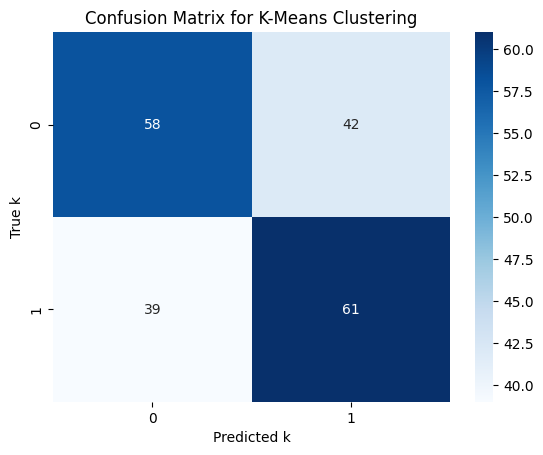

In [22]:
# Modify this directly for your example
mu_1 = np.array([0.0, 0.0]) # mean of k=1
mu_2 = np.array([0.2, 0.2]) # mean of k=2
sigma = np.array([[0.2, 0], [0, 0.2]]) # use same variance
N = 100 # observations
X_1 = np.random.multivariate_normal(mu_1, sigma, N)
X_2 = np.random.multivariate_normal(mu_2, sigma, N)
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 1})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 2})
df = pd.concat([df_1, df_2], ignore_index=True)
kmeans = KMeans(n_clusters=2, random_state=0)
df["k_hat"] = kmeans.fit_predict(df[["f1", "f2"]]) + 1
cm = confusion_matrix(df["k"], df["k_hat"])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

# I decreased the second mu to 0.2, 0.2 causing the two clusters to be closer together. This decreases the accuracy of the K-means clustering algorithm. 

## Q2.2

Repeat the same thing as Q2.1, but change a different parameter to make
it perform worse in a different way. Briefly explain why

/home/sjone9/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


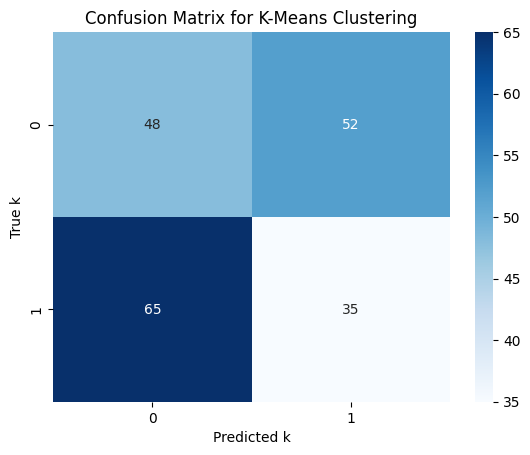

In [23]:
# Modify this directly for your example
mu_1 = np.array([0.0, 0.0]) # mean of k=1
mu_2 = np.array([1.0, 1.0]) # mean of k=2
sigma = np.array([[2.0, 0], [0, 2.0]]) # use same variance
N = 100 # observations
X_1 = np.random.multivariate_normal(mu_1, sigma, N)
X_2 = np.random.multivariate_normal(mu_2, sigma, N)
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 1})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 2})
df = pd.concat([df_1, df_2], ignore_index=True)
kmeans = KMeans(n_clusters=2, random_state=0)
df["k_hat"] = kmeans.fit_predict(df[["f1", "f2"]]) + 1
cm = confusion_matrix(df["k"], df["k_hat"])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

# I increased the variance to 2, causing the clusters to be more spread out and harder to separate, causing the confusion matrix to be less accurate.

# Q3.2

Take the following example of generated data and latents

/home/sjone9/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjone9/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjone9/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjone9/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


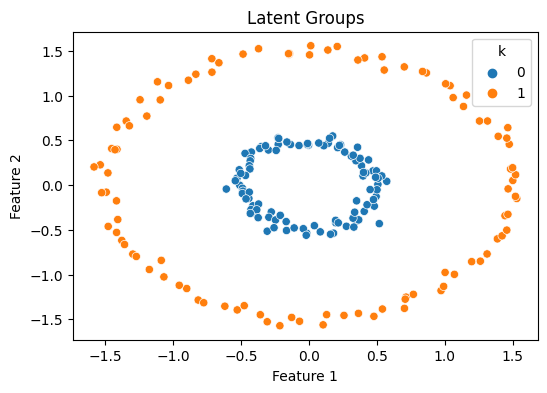

In [24]:
def generate_noisy_circle(radius, num_points, noise_std):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = radius * np.cos(theta) + np.random.normal(0, noise_std, num_points)
    y = radius * np.sin(theta) + np.random.normal(0, noise_std, num_points)
    return np.column_stack((x, y))

# Generate data for inner and outer circles
X_1 = generate_noisy_circle(0.5, 100, 0.05)
X_2 = generate_noisy_circle(1.5, 100, 0.05)

# Create dataframes
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 0})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 1})
df = pd.concat([df_1, df_2], ignore_index=True)
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x="f1", y="f2", hue="k", ax=ax)
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="Latent Groups")
plt.show()

Note that the `k=0` and `k=1` state are fully separated and the
difference is visually obvious. Now lets perform k-means clustering

/home/sjone9/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


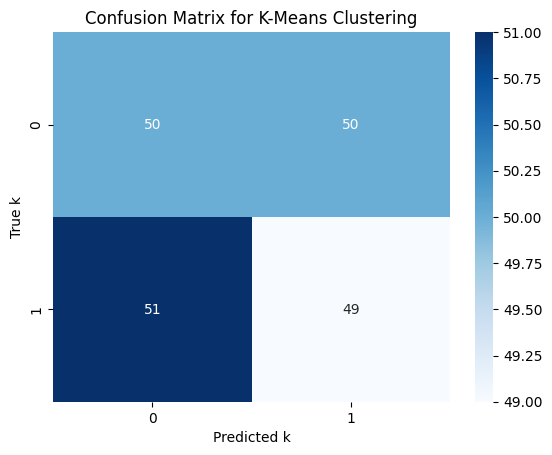

In [25]:
kmeans = KMeans(n_clusters=2, random_state=0)
df["k_hat"] = kmeans.fit_predict(df[["f1", "f2"]])

# Create confusion matrix
cm = confusion_matrix(df["k"], df["k_hat"])

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

Can you explain why this was a failure using your knowledge of k-means
clustering? Be precise if possible.

**(double click to add an explanation here)**
K means clustering fails here because both clusters have the center at the same point, causing the algorithm to not be able to distinguish between the two clusters. This is because the algorithm is trying to minimize the sum of squared distances from each point to the center, and the two clusters have the same center Meaning that the two variables are not linearly seprable.

But all is not lost! Look at the results of the following code which
uses a different algorithm

/home/sjone9/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


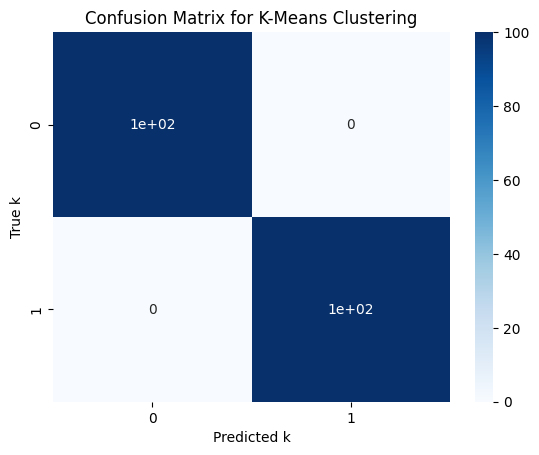

In [26]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
df["k_hat"] = spectral_clustering.fit_predict(df[["f1", "f2"]])

# Create confusion matrix
cm = confusion_matrix(df["k"], df["k_hat"])
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

Lookup [spectral
clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
in skikit-learn docs, etc. and provide a 2 sentence summary of why this
worked.

**(double click to add your explanation of why spectral clustering
worked)**
This may be because the data is not linearly separable in the original space, but is linearly separable in a higher dimensional space. The spectral clustering algorithm is able to project the data into a higher dimensional space, and then perform k means clustering in that space. This allows the algorithm to find a linear separation between the two clusters.

In other words, spectral clustering minimizes the distance between the nearest neighbors of each point in the cluster, rather than the distance between the center of the cluster and each point in the cluster. This allows the algorithm to find a linear separation between the two clusters. This is because the data is not linearly separable when minimizing the distance to a center point but it becomes separable when minimizing the distance between the nearest neighbors of each point. Though this produces a better separation, it also comes at the cost of a higher computational complexity which is why it is not used as often as k means clustering.

# Q4

Consider the following map

$$
x_{t+1} = f(x_t) = a x_t^2 + (1-a)
$$

Where we will assume that $a=\frac{3}{4}$. The code below comes from the
lecture notes, and can be used to simulate this map

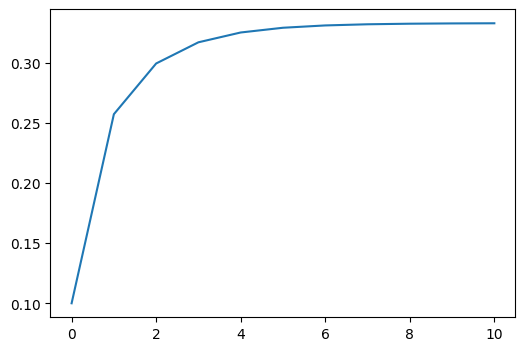

In [27]:
def simulate(f, X_0, T):
    X = np.zeros((1, T+1))
    X[:,0] = X_0
    for t in range(T):
        X[:,t+1] = f(X[:,t])
    return X
def f(x, a):
    return a * x**2 + (1-a)
T = 10
x_0 = 0.1
X = simulate(lambda x : f(x, 3/4), x_0, T) # use a=3/4
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T)

# Q4.1

If I solve the equation $x^* = f(x^*)$ for $x^*$ using the quadratic
formula you get the following:

In [28]:
def x_star(a):
  return [(1 + np.sqrt(1 - 4 * a*(1-a)))/(2*a),(1 - np.sqrt(1 - 4 * a*(1-a)))/(2*a)]  
print(f"x^* = {x_star(3/4)}")

x^* = [1.0, 0.3333333333333333]


Adjust the above code to simulate up to $T=5$ from $x_0 = 0.9$ and
$x_0 = 1.1$ and plot the results.

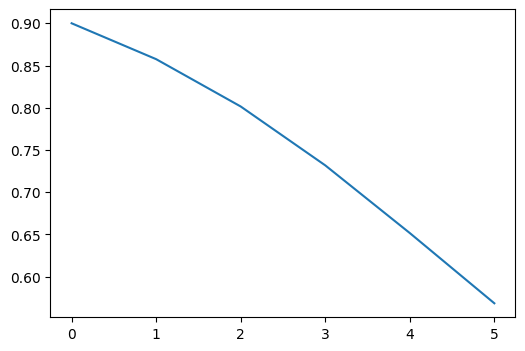

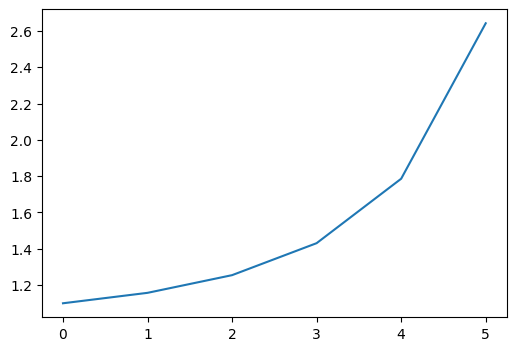

In [29]:
# Modify this code
T = 5
x_0 = 0.9
X = simulate(lambda x : f(x, 3/4), x_0, T) # use a=3/4
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T)

x_0 = 1.1
X = simulate(lambda x : f(x, 3/4), x_0, T) # use a=3/4
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T)

What do you notice about this and how do you intepret the different
behavior for various $x_0$?

**(double click to add your explanation)**
Solving for the roots of the quardratic, it tells us that there exists two stationary points, one at 0.333 at another at 1. The behavior of the system depends on the initial condition. If the initial x is less than 1 at 0.9, the system will converge to the stationary point at 0.333. If the initial x is greater than 1 at 1.1, the system will diverge away and continue to increase away from 1 to infinity. If the inital x is less than 0.33, the system will eventually converge to 0.33. If it is between 0.33 and 1, it will converge to 1.

# Q4.3

See the graph below with $x_0 = 1.0$ and a very large $T$.

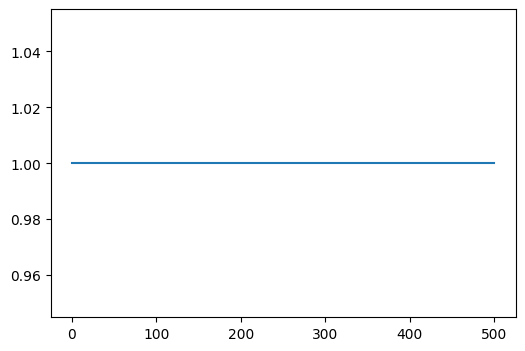

In [30]:
T = 500
X = simulate(lambda x : f(x, 3/4), 1.0, T)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(T+1), X.T)

And $x_0 = 1 + 10^{-15}$ and even a smaller $T$

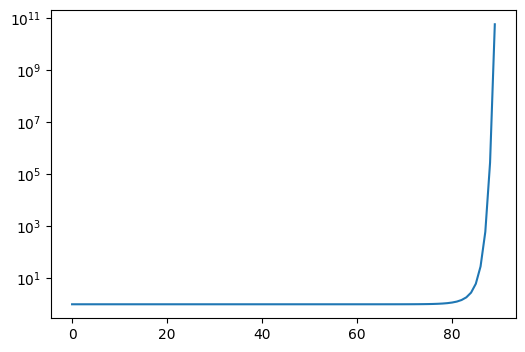

In [31]:
T = 89
X = simulate(lambda x : f(x, 3/4), 1 + 1e-15, T)
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_yscale('log')
ax.plot(range(T+1), X.T)

Notice the `log` scale on the axis. Briefly interpret these results

**(double click to add your interpretation)**
When inital x is 1, it is stable and will converge to the fixed point 1. But when you marginally increase it to 1 + 10^-15, it will diverge away from 1 and continue to increase. This is because the system is very sensitive to the initial condition, and a very small change in the initial condition will cause the system to diverge away from the fixed point when x = 1. The system will then reach a point where it will exponentially increase away from the fixed point when x = 1.

# Q5

Find some economic or financial data on the web of your choice

1.  Download it and load it into a pandas dataframe
2.  Either run PCA or k-means clustering on the data
3.  Briefly intrepret the results in whatever way you wish

We are not giving you a list of possible datasources because we want you
to explore to look for interesting sources of data.

The economic rational for looking for the dimension reduction or the
clustering doesn’t need to be especially tight, but do your best to
explain why you ran the particular specification.

For the data, post a link to where you found it but: no need to have it
automatically downloaded in the notebook, and no need to post it up with
your problem set.

[3.54357565e+13 1.53307457e+12 9.04846180e+11 5.71244025e+11]
[9.97224097e-01 1.86653400e-03 6.50217811e-04 2.59150880e-04]


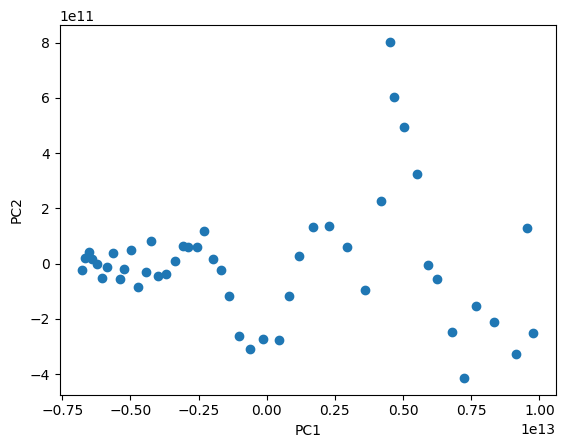

In [32]:
# Your code here
econ_data = pd.read_csv('econ_data.csv', nrows=4, index_col='Series Name')
econ_data = econ_data.drop(columns=['Country Code', 'Series Code', 'Country Name'])
econ_data = econ_data.T
econ_data = econ_data.replace('..', np.nan)
econ_data = econ_data.dropna()

print(PCA(n_components=4).fit(econ_data).singular_values_)
print(PCA(n_components=4).fit(econ_data).explained_variance_ratio_)

pca = PCA(n_components=2)
pcs = pca.fit_transform(econ_data)

plt.scatter(pcs[:, 0], pcs[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



**(double click to add a brief interpretation or summary)**
This pca analysis tells me that the first principal component explains 99.7% of the variance of the data. Along with the high corresponding singular value, this means that the first principal component is a good representation of the data. This means that there is a high likelihood we can represent the data in a lower dimension space. From here, we can identify clusters of data points that are similar to each other. This implies that there are some underlying factors that are driving the data. 

Link to data: https://databank.worldbank.org/source/world-development-indicators#

Parameters: 

Time (1984-2022), 

Country (United States), 

Series (Adjusted net savings, excluding particulate emission damage (current US$), Foreign direct investment, net (BoP, current US$), Final consumption expenditure (current US$), Exports of goods and services (current US$))